## Download CPU Benchmark Data

In [0]:
!wget -q http://preshing.com/files/specdata20120207.zip
!unzip -q specdata20120207.zip
!rm specdata20120207.zip

## Import Libraries

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(rc={'figure.figsize':(12, 8)})
from datetime import datetime
import warnings
warnings.simplefilter('ignore')

## Load and Explore Data

In [3]:
data = pd.read_csv('benchmarks.txt', low_memory=False)
data.head()

,testID,benchName,base,peak
0,cpu95-19990104-03254,101.tomcatv,19.40,27.1
1,cpu95-19990104-03254,102.swim,27.20,34.8
2,cpu95-19990104-03254,103.su2cor,10.10,9.98
3,cpu95-19990104-03254,104.hydro2d,8.58,8.61
4,cpu95-19990104-03254,107.mgrid,8.94,9.44


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136995 entries, 0 to 136994
Data columns (total 4 columns):
testID       136995 non-null object
benchName    136995 non-null object
base         136995 non-null float64
peak         131575 non-null object
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [5]:
pd.unique(data.benchName)

array(['101.tomcatv', '102.swim', '103.su2cor', '104.hydro2d',
       '107.mgrid', '110.applu', '125.turb3d', '141.apsi', '145.fpppp',
       '146.wave5', '099.go', '124.m88ksim', '126.gcc', '129.compress',
       '130.li', '132.ijpeg', '134.perl', '147.vortex', '168.wupwise',
       '171.swim', '172.mgrid', '173.applu', '177.mesa', '178.galgel',
       '179.art', '183.equake', '187.facerec', '188.ammp', '189.lucas',
       '191.fma3d', '200.sixtrack', '301.apsi', '164.gzip', '175.vpr',
       '176.gcc', '181.mcf', '186.crafty', '197.parser', '252.eon',
       '253.perlbmk', '254.gap', '255.vortex', '256.bzip2', '300.twolf',
       '400.perlbench', '401.bzip2', '403.gcc', '429.mcf', '445.gobmk',
       '456.hmmer', '458.sjeng', '462.libquantum', '464.h264ref',
       '471.omnetpp', '473.astar', '483.xalancbmk', '410.bwaves',
       '416.gamess', '433.milc', '434.zeusmp', '435.gromacs',
       '436.cactusADM', '437.leslie3d', '444.namd', '447.dealII',
       '450.soplex', '453.povray', 

## Select Specific Benchmark

In [6]:
mesa_data = data[data['benchName'] == '177.mesa']
mesa_data.head()

,testID,benchName,base,peak
9954,cpu2000-19991130-00002,177.mesa,130.0,NaN
9980,cpu2000-19991130-00004,177.mesa,198.0,NaN
10006,cpu2000-19991130-00006,177.mesa,502.0,502
10032,cpu2000-19991130-00008,177.mesa,195.0,NaN
10058,cpu2000-19991130-00010,177.mesa,386.0,366


## Extract Date and Base Speed of Benchmark

In [0]:
mesa_data['date'] = [datetime.strptime(ID.split('-')[1], '%Y%m%d') for ID in mesa_data.testID]
mesa_data['year'] = pd.DatetimeIndex(mesa_data['date']).year
mesa_data['constant'] = 1
mesa_data['peak'] = mesa_data.peak.fillna(0)
mesa_data.peak = mesa_data.peak.astype(float)
mesa_data['timeStamp'] = [i.timestamp() for i in mesa_data['date']]
mesa_data['baseLog2'] = np.log2(mesa_data.base)
mesa_data['peakLog2'] = np.log2(mesa_data.peak)

## Fit a Linear Model and Plot

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [9]:
X = mesa_data[['timeStamp', 'constant']]
y = mesa_data.baseLog2

X_train, X_test, y_train, y_test = train_test_split(X[:1385], y, random_state=1, test_size=0.2)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = linreg.predict(X_test)

In [11]:
print('Coefficients: \n', linreg.coef_)
print("Root Mean Squared Error: %.2f"
      % np.sqrt(MSE(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % R2(y_test, y_pred))
r2= R2(y_test, y_pred)

Coefficients: 
 [1.21138149e-08 0.00000000e+00]
Root Mean Squared Error: 0.52
Variance score: 0.69


In [0]:
baseReg = linreg.fit(X, y)
mesa_data['baseReg'] = baseReg

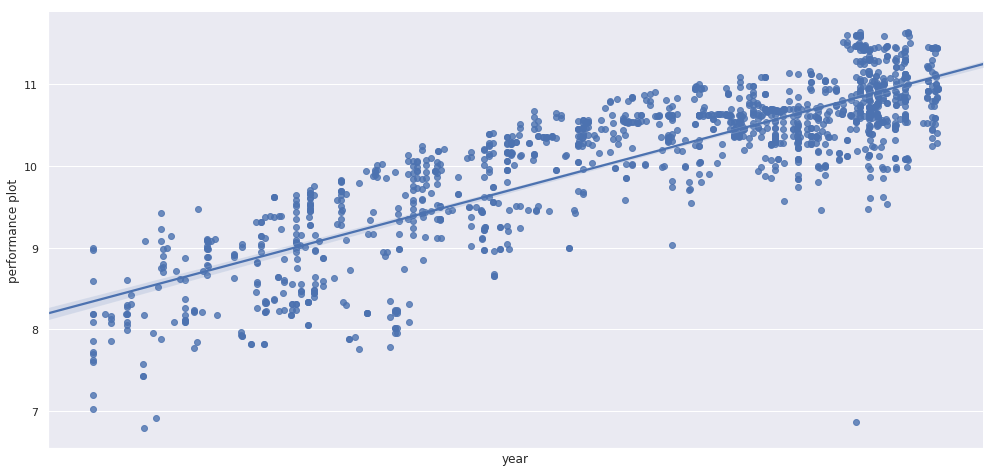

In [13]:
ax = sns.lmplot(x='timeStamp', y='baseLog2', data=mesa_data, size=7, aspect=2)
plt.xlabel('year')
plt.ylabel('performance plot')
plt.xticks([]);

# MNIST K-nearest Neighbors

In [14]:
from sklearn import datasets, neighbors

digits = datasets.load_digits()
X_digits = digits.data / digits.data.max()
y_digits = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=1)

knn = neighbors.KNeighborsClassifier()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.993333


<Figure size 864x576 with 0 Axes>

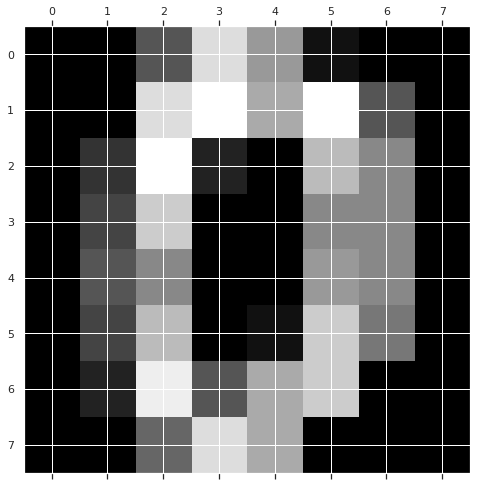

<Figure size 864x576 with 0 Axes>

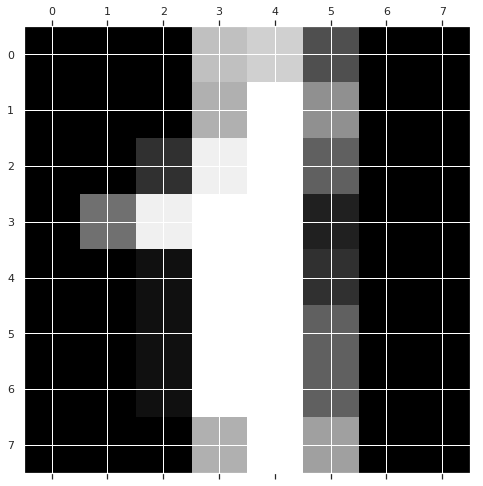

<Figure size 864x576 with 0 Axes>

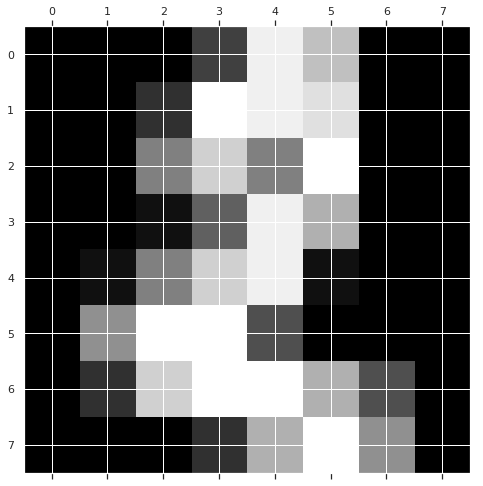

In [15]:
for i in range(3):
    plt.gray() 
    plt.matshow(digits.images[i]) 
    plt.show()

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
mnist_preds = knn.predict(X_test)
print(classification_report(mnist_preds, y_test))
print(confusion_matrix(mnist_preds, y_test))
print(accuracy_score(mnist_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        42
           2       0.98      1.00      0.99        40
           3       1.00      1.00      1.00        52
           4       1.00      1.00      1.00        47
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        43
           7       0.98      0.98      0.98        48
           8       1.00      1.00      1.00        37
           9       1.00      0.96      0.98        50

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  1

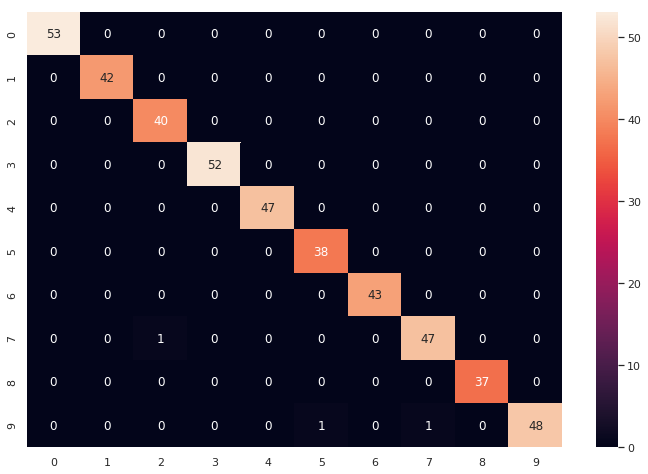

In [19]:
sns.heatmap(confusion_matrix(mnist_preds, y_test), annot=True);